### D&D Bestiary Analysis

For the purpose of fun and practice we are going to answer some questions regarding the Dungeons & Dragons' monsters:

- Wisdom VS Intelligence: Good VS Evil?

  Is it more likely to be intelligent when you are evil, or wise?

In [58]:
pip install squarify

Note: you may need to restart the kernel to use updated packages.


In [59]:
import numpy as np
import os
import re
import pandas as pd
import seaborn as sns
from datetime import datetime
import squarify
import matplotlib.pyplot as plt

***

This is our DataFrame:

In [60]:
df = pd.read_csv("monsters.csv")

In [61]:
df.head(5)

,name,url,cr,type,size,ac,hp,speed,align,legendary,source,str,dex,con,int,wis,cha
0,aarakocra,https://www.aidedd.org/dnd/monstres.php?vo=aar...,1/4,humanoid (aarakocra),Medium,12,13,fly,neutral good,NaN,Monster Manual (BR),10.0,14.0,10.0,11.0,12.0,11.0
1,abjurer,NaN,9,humanoid (any race),Medium,12,84,NaN,any alignment,NaN,Volo's Guide to Monsters,NaN,NaN,NaN,NaN,NaN,NaN
2,aboleth,https://www.aidedd.org/dnd/monstres.php?vo=abo...,10,aberration,Large,17,135,swim,lawful evil,Legendary,Monster Manual (SRD),21.0,9.0,15.0,18.0,15.0,18.0
3,abominable-yeti,NaN,9,monstrosity,Huge,15,137,NaN,chaotic evil,NaN,Monster Manual,NaN,NaN,NaN,NaN,NaN,NaN
4,acererak,NaN,23,undead,Medium,21,285,NaN,neutral evil,NaN,Adventures (Tomb of Annihilation),NaN,NaN,NaN,NaN,NaN,NaN


***

### EDA / Cleaning proccess:

In [62]:
df["cr"].unique()

array(['1/4', '9', '10', '23', '14', '17', '16', '13', '15', '2', '5',
       '7', nan, '11', '1/2', '18', '21', '20', '22', '24', '1', '3', '6',
       '12', '8', '0', '4', '19', '1/8', '26', '25', '30'], dtype=object)

In [63]:
df["size"].unique()

array(['Medium', 'Large', 'Huge', 'Gargantuan', 'Small', 'Tiny'],
      dtype=object)

In [64]:
df["ac"].unique()

array([12, 17, 15, 21, 10, 19, 18, 14, 13,  0, 22, 20, 16,  7, 11,  9,  5,
        6,  8, 24, 25])

In [65]:
df["speed"].unique()

array(['fly', nan, 'swim', 'fly, swim'], dtype=object)

In [66]:
df["source"].unique()

array(['Monster Manual (BR)', "Volo's Guide to Monsters",
       'Monster Manual (SRD)', 'Monster Manual',
       'Adventures (Tomb of Annihilation)', "Mordenkainen's Tome of Foes",
       'Adventures (Tyranny of Dragons)', 'Extra (AideDD)',
       'Extra (Dragon Mag)', 'Adventures (Descent into Avernus)',
       "Adventures (Storm King's Thunder)", 'Essentials Kit',
       'Extra (Adventurers League)',
       'Adventures (Dungeon of the Mad Mage)',
       'Adventures (Princes of the Apocalypse)',
       'Adventures (Dragon Heist)', 'Adventures (Curse of Strahd)'],
      dtype=object)

We find some unclean values in the column "align":

In [67]:
df["align"].unique()

array(['neutral good', 'any alignment', 'lawful evil', 'chaotic evil',
       'neutral evil', 'chaotic good', 'lawful good', 'unaligned',
       'neutral', 'lawful neutral', 'any evil alignment',
       'any non-good alignment', 'chaotic neutral',
       'any non-lawful alignment', 'any chaotic alignment',
       'neutral good ', 'chaotic good '], dtype=object)

In [68]:
df["align"] = df["align"].str.replace(" +$", "")

/var/folders/c9/6zwnylqn0v3b4prwfdpt2ndc0000gn/T/ipykernel_8330/99145209.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df["align"] = df["align"].str.replace(" +$", "")


In [69]:
df["align"].unique()

array(['neutral good', 'any alignment', 'lawful evil', 'chaotic evil',
       'neutral evil', 'chaotic good', 'lawful good', 'unaligned',
       'neutral', 'lawful neutral', 'any evil alignment',
       'any non-good alignment', 'chaotic neutral',
       'any non-lawful alignment', 'any chaotic alignment'], dtype=object)

In [70]:
df.shape

(762, 17)

We find 762 rows and 17 columns on this DataFrame.

We find some null values in our columns, specially in the columns "str", "dex", "con", etc., which are pretty important for our analysis.

We have a hunch these are the rows also affected by the column "url", and imagine the reason these values are empty is because these creatures' data isn't properly collected, for the "abjurer" we see in the .head() doesn't actually exist in Dungeons & Dragons' rules by this name. Instead, we assume it refers to the creature called "abjurer wizard", which does exist.

In [71]:
df.isnull().sum()

name           0
url          361
cr             1
type           0
size           0
ac             0
hp             0
speed        514
align          0
legendary    719
source         0
str          361
dex          361
con          361
int          361
wis          361
cha          361
dtype: int64

We have decided to dispose of the column "url" because we have no use for it:

In [72]:
df = df.drop(["url"], axis = 1)

In [73]:
df.columns

Index(['name', 'cr', 'type', 'size', 'ac', 'hp', 'speed', 'align', 'legendary',
       'source', 'str', 'dex', 'con', 'int', 'wis', 'cha'],
      dtype='object')

On the columns we find the name of the creature, its Challenge Rating, type, size, Armor Class, speed, alignment and wheter or not it is legendary.

We can also find the its core stats: Strength, Dexterity, Constitution, Intelligence, Wisdom and Charisma.

In [74]:
df.head(5)

,name,cr,type,size,ac,hp,speed,align,legendary,source,str,dex,con,int,wis,cha
0,aarakocra,1/4,humanoid (aarakocra),Medium,12,13,fly,neutral good,NaN,Monster Manual (BR),10.0,14.0,10.0,11.0,12.0,11.0
1,abjurer,9,humanoid (any race),Medium,12,84,NaN,any alignment,NaN,Volo's Guide to Monsters,NaN,NaN,NaN,NaN,NaN,NaN
2,aboleth,10,aberration,Large,17,135,swim,lawful evil,Legendary,Monster Manual (SRD),21.0,9.0,15.0,18.0,15.0,18.0
3,abominable-yeti,9,monstrosity,Huge,15,137,NaN,chaotic evil,NaN,Monster Manual,NaN,NaN,NaN,NaN,NaN,NaN
4,acererak,23,undead,Medium,21,285,NaN,neutral evil,NaN,Adventures (Tomb of Annihilation),NaN,NaN,NaN,NaN,NaN,NaN


We have decided to keep working on this DataFrame and try to merge it with a different one that has no nulls (but has many information we don't find useful).

First, we rename the columns we want to dispose of to be aware of them:

In [75]:
df = df.rename(columns = {"str" : "str2", "int": "int2", "con" : "con2", "wis" : "wis2", "dex" : "dex2", "cha" : "cha2", "legendary" : "legendary2"}, errors = "raise")

In [76]:
df2 = pd.read_csv("monsters_better.csv")

In [77]:
df2.shape[0] == df.shape[0]

True

We find the second DataFrame is identycal in rows as the first one, which is just perfect.

In [78]:
df2.columns

Index(['name', 'size', 'type', 'alignment', 'languages', 'ac', 'hp', 'cr',
       'speed', 'swim', 'fly', 'climb', 'burrow', 'passive_perception',
       'darkvision', 'truesight', 'tremorsense', 'blindsight', 'strength',
       'str_mod', 'dex', 'dex_mod', 'con', 'con_mod', 'intel', 'int_mod',
       'wis', 'wis_mod', 'cha', 'cha_mod', 'str_save', 'dex_save', 'con_save',
       'int_save', 'wis_save', 'cha_save', 'history', 'perception', 'stealth',
       'persuasion', 'insight', 'deception', 'arcana', 'religion',
       'acrobatics', 'athletics', 'intimidation', 'senses', 'attributes',
       'actions', 'legendary_actions', 'legendary', 'source'],
      dtype='object')

In [79]:
df2 = df2[["intel", "wis", "cha", "strength", "dex", "con", "legendary"]]

In [80]:
df2.head(2)

,intel,wis,cha,strength,dex,con,legendary
0,11,12,11,10,14,10,0
1,18,12,11,9,14,14,0


In [81]:
df2 = df2.rename(columns = {"strength": "str", "intel": "int"}, errors = "raise")

In [82]:
df2.head(2)

,int,wis,cha,str,dex,con,legendary
0,11,12,11,10,14,10,0
1,18,12,11,9,14,14,0


In [83]:
df_total = pd.concat([df, df2], axis = 1, ignore_index = False)

In [84]:
df = df_total.drop(["str2", "dex2", "con2", "int2", "wis2", "cha2", "legendary2"], axis = 1)

Now we'd like to replace the legendary column with strings:

In [85]:
df.sample(5)

,name,cr,type,size,ac,hp,speed,align,source,int,wis,cha,str,dex,con,legendary
146,crocodile,1/2,beast,Large,12,19,swim,unaligned,Monster Manual (SRD),2,10,5,15,10,13,0
205,duergar-mind-master,2,humanoid (dwarf),Medium,14,39,NaN,lawful evil,Mordenkainen's Tome of Foes,15,10,12,11,17,14,0
555,rutterkin,2,fiend (demon),Medium,12,37,NaN,chaotic evil,Mordenkainen's Tome of Foes,5,12,6,14,15,17,0
309,githzerai-anarch,16,humanoid (gith),Medium,20,144,fly,lawful neutral,Mordenkainen's Tome of Foes,18,20,14,16,21,18,0
317,gnoll-fang-of-yeenoghu,4,fiend (gnoll),Medium,14,65,NaN,chaotic evil,Monster Manual,10,11,13,17,15,15,0


In [86]:
df["legendary"] = df["legendary"].astype(str)

In [87]:
df["legendary"] = df["legendary"].replace(["0", "1"], ["Not legendary", "Legendary"])

In [88]:
df.sample(5)

,name,cr,type,size,ac,hp,speed,align,source,int,wis,cha,str,dex,con,legendary
51,armanite,7,fiend (demon),Large,16,84,NaN,chaotic evil,Mordenkainen's Tome of Foes,8,12,13,21,18,21,Not legendary
423,manes,1/8,fiend (demon),Small,9,9,NaN,chaotic evil,Monster Manual,3,8,4,10,9,13,Not legendary
585,solar,21,celestial,Large,21,243,fly,lawful good,Monster Manual (SRD),25,25,30,26,22,26,Legendary
713,white-dragon-wyrmling,2,dragon,Medium,16,32,"fly, swim",chaotic evil,Monster Manual (SRD),5,10,11,14,10,14,Not legendary
59,awakened-tree,2,plant,Huge,13,59,NaN,unaligned,Monster Manual (SRD),10,10,7,19,6,15,Not legendary


In [89]:
df["speed"] = df["speed"].fillna("-")

In [90]:
df.head()

,name,cr,type,size,ac,hp,speed,align,source,int,wis,cha,str,dex,con,legendary
0,aarakocra,1/4,humanoid (aarakocra),Medium,12,13,fly,neutral good,Monster Manual (BR),11,12,11,10,14,10,Not legendary
1,abjurer,9,humanoid (any race),Medium,12,84,-,any alignment,Volo's Guide to Monsters,18,12,11,9,14,14,Not legendary
2,aboleth,10,aberration,Large,17,135,swim,lawful evil,Monster Manual (SRD),18,15,18,21,9,15,Legendary
3,abominable-yeti,9,monstrosity,Huge,15,137,-,chaotic evil,Monster Manual,9,13,9,24,10,22,Not legendary
4,acererak,23,undead,Medium,21,285,-,neutral evil,Adventures (Tomb of Annihilation),27,21,20,13,16,20,Not legendary


In [122]:
df[df["cr"].isna()]

,name,cr,type,size,ac,hp,speed,align,source,int,wis,cha,str,dex,con,legendary
22,aldani,NaN,monstrosity,Medium,0,0,swim,lawful neutral,Adventures (Tomb of Annihilation),10,14,10,13,8,12,Not legendary


In [123]:
df["cr"] = df["cr"].fillna("1")

In [126]:
df.isnull().sum().sum()

0

In [127]:
df.to_csv("monsters_total.csv")

***

### Wisdom VS Intelligence: Good VS Evil?

We feel curious to find out if there is any relation between a creature's alignment and whether it is intelligent or wise. We find that, many times, intelligence is associated with dark motivations, and wisdom, with fair ones.

In [92]:
df["align"].unique()

array(['neutral good', 'any alignment', 'lawful evil', 'chaotic evil',
       'neutral evil', 'chaotic good', 'lawful good', 'unaligned',
       'neutral', 'lawful neutral', 'any evil alignment',
       'any non-good alignment', 'chaotic neutral',
       'any non-lawful alignment', 'any chaotic alignment'], dtype=object)

In [93]:
list_good = ["neutral good", "lawful good", "chaotic good"]

In [94]:
df_good = df[df['align'].isin(list_good)]

In [95]:
df_good["align"].unique()

array(['neutral good', 'chaotic good', 'lawful good'], dtype=object)

<AxesSubplot:xlabel='align', ylabel='wis'>

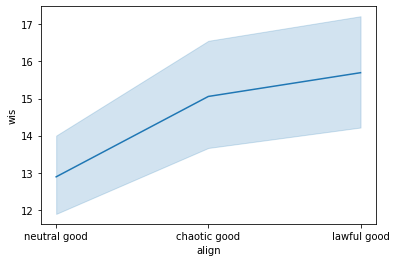

In [96]:
sns.lineplot(data = df_good, x = "align", y = "wis")

<AxesSubplot:xlabel='align', ylabel='int'>

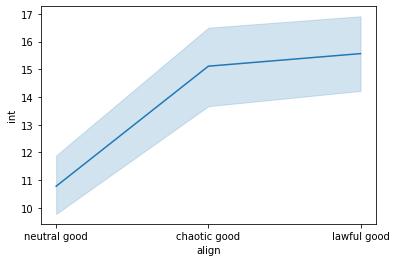

In [97]:
sns.lineplot(data = df_good, x = "align", y = "int")

We are a little bit shocked to find out that, without a shadow of a doubt, lawful good characters are the most intelligent and wise of them all!

In [98]:
list_evil = ["lawful evil", "chaotic evil", "neutral evil"]

In [99]:
df_evil = df[df['align'].isin(list_evil)]

<AxesSubplot:xlabel='align', ylabel='wis'>

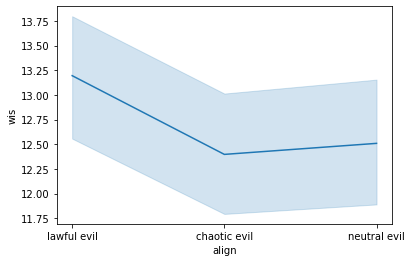

In [100]:
sns.lineplot(data = df_evil, x = "align", y = "wis")

<AxesSubplot:xlabel='align', ylabel='int'>

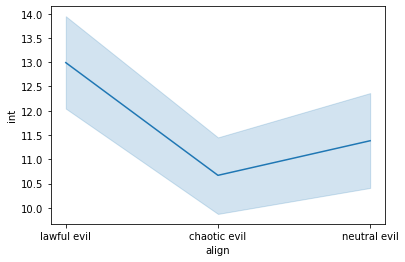

In [101]:
sns.lineplot(data = df_evil, x = "align", y = "int")

Following friends' advice I'm going to find out the differences between the Charisma stat, which may result enlightning.

<AxesSubplot:xlabel='align', ylabel='cha'>

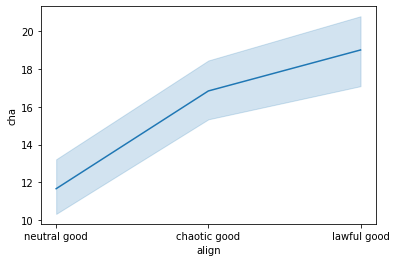

In [102]:
sns.lineplot(data = df_good, x = "align", y = "cha")

<AxesSubplot:xlabel='align', ylabel='cha'>

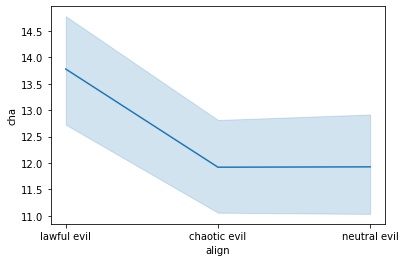

In [103]:
sns.lineplot(data = df_evil, x = "align", y = "cha")

We actually expected evil alignments to excel at Charisma, so we are surprised to find out that lawful good aligned characters are the most intelligent, the most wise and also the most charismatic of them all!

Good wins!

***

### Legendary creatures.

In [104]:
df_legendary = df[df["legendary"] == "Legendary"]

In [105]:
print("There is a", 100 * df_legendary.shape[0]/df.shape[0], "percentage of legendary creatures in the D&D monsters' list.")

There is a 5.6430446194225725 percentage of legendary creatures in the D&D monsters' list.


In [106]:
print("And there are, in total", df_legendary.shape[0], "legendary creatures in D&D.")

And there are, in total 43 legendary creatures in D&D.


Let's find out more! How many of them are dragons?

In [107]:
df_legendary_dragons = df_legendary["type"] == "dragon"

In [108]:
print("There are", df_legendary_dragons.shape[0], "legendary dragons in D&D! That's every legendary creature!")

There are 43 legendary dragons in D&D! That's every legendary creature!


***

### Relations between AC and HP

<AxesSubplot:xlabel='ac', ylabel='hp'>

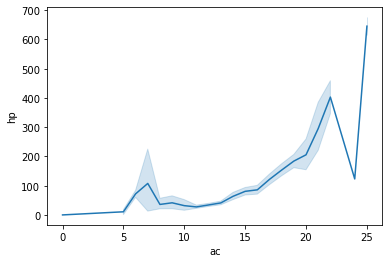

In [109]:
sns.lineplot(data = df, x = "ac", y = "hp")

In [110]:
media_ac = df["ac"].mean()
media_ac

14.57742782152231

In [111]:
max_ac = df["ac"].max()
max_ac

25

In [112]:
min_ac = df["ac"].min()
min_ac

0

In [113]:
df_ac = df["ac"]

In [114]:
df_ac.describe()

count    762.000000
mean      14.577428
std        3.140581
min        0.000000
25%       12.000000
50%       14.000000
75%       17.000000
max       25.000000
Name: ac, dtype: float64